[Python investpyで株、為替、経済指標データを取得する](https://qiita.com/matsxxx/items/f7c50b88f0b6d1c9e4d5)<br>
[investpyを使ったInvesting.comからのデータ取得方法](https://oeconomicus.jp/2021/06/python-infestpy/)

<Figure size 432x288 with 0 Axes>

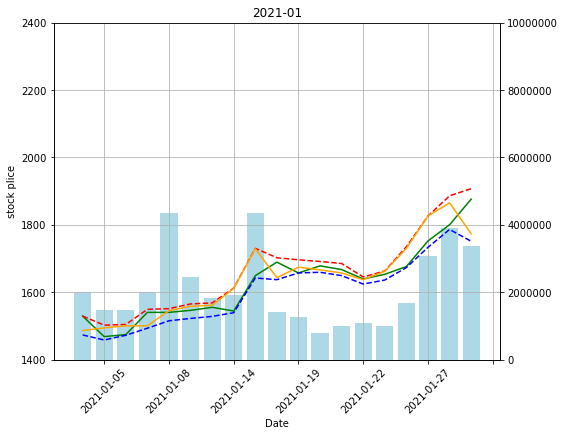

<Figure size 432x288 with 0 Axes>

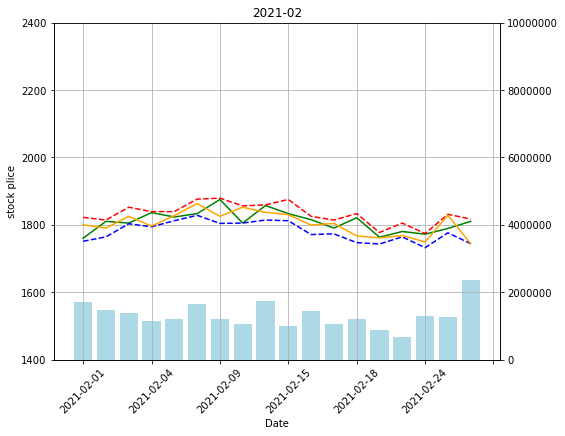

<Figure size 432x288 with 0 Axes>

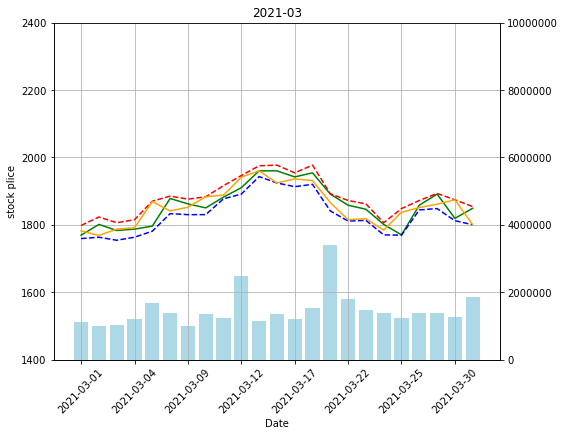

<Figure size 432x288 with 0 Axes>

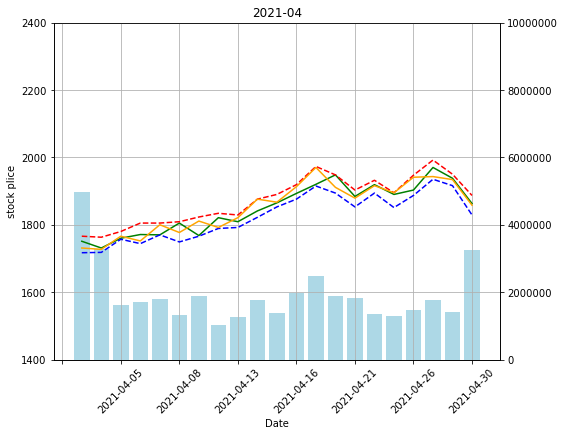

<Figure size 432x288 with 0 Axes>

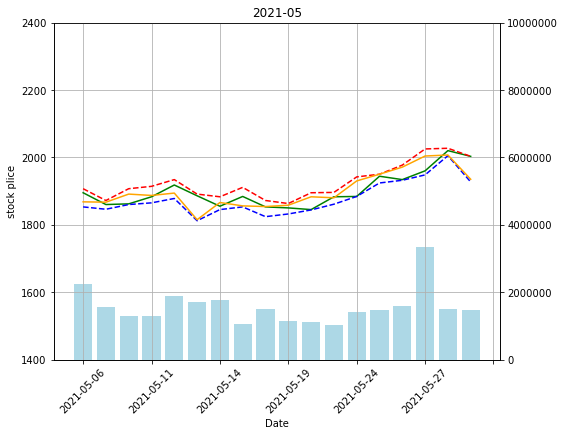

<Figure size 432x288 with 0 Axes>

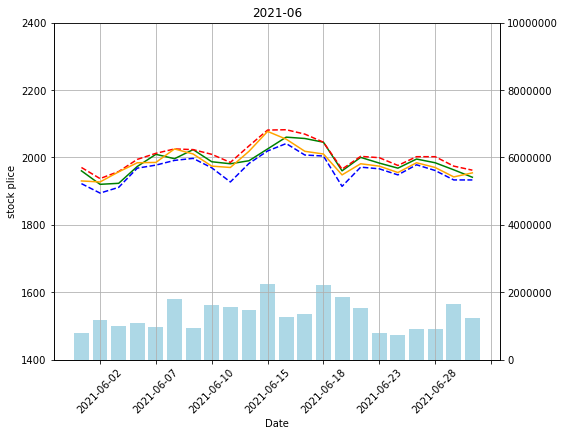

<Figure size 432x288 with 0 Axes>

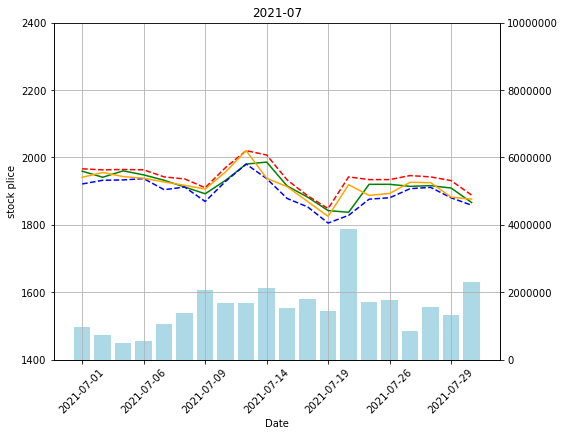

<Figure size 432x288 with 0 Axes>

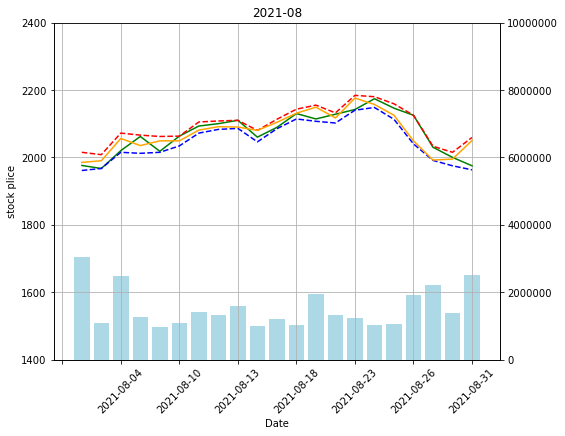

<Figure size 432x288 with 0 Axes>

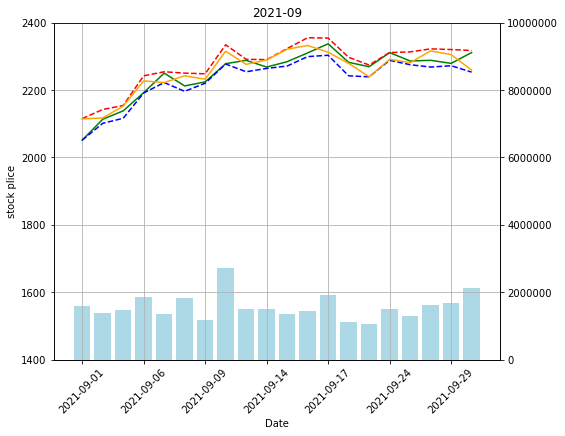

<Figure size 432x288 with 0 Axes>

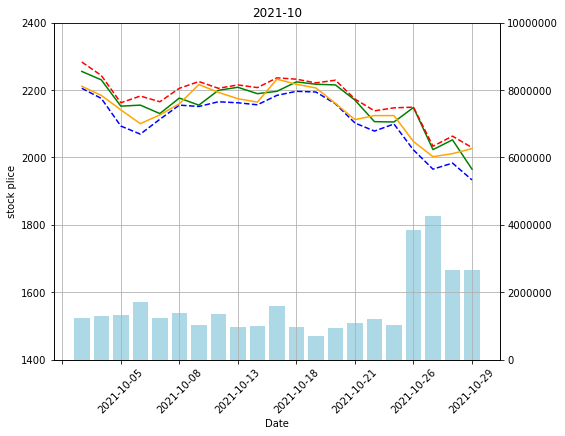

<Figure size 432x288 with 0 Axes>

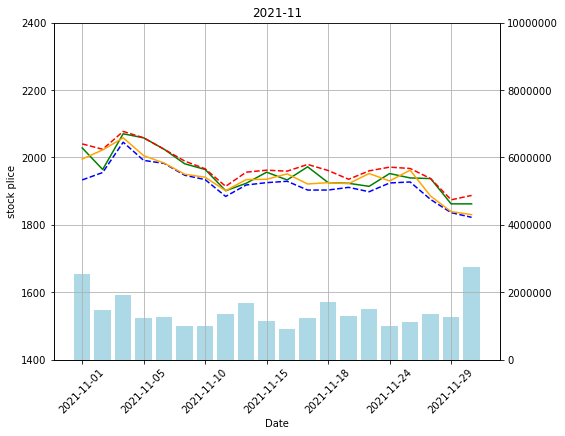

<Figure size 432x288 with 0 Axes>

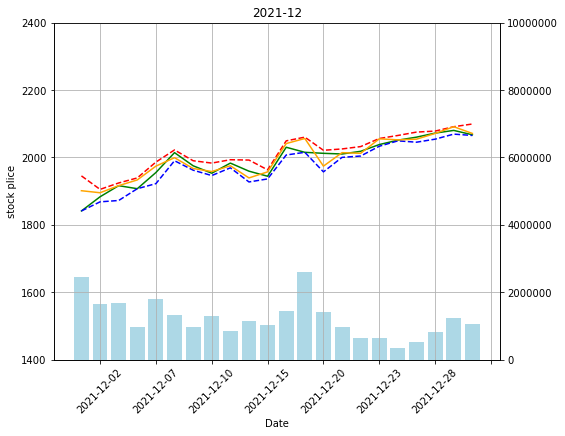

"\n\n#リサイズ\nfor i in range(12):\n    m1_s[i] = cv2.resize(infile[i], dsize=(0, 0), fx=2.5, fy=1.5)\n\nim_tile = concat_tile([[m1_s[0], m1_s[1], m1_s[2],  m1_s[3]],\n                       [m1_s[4], m1_s[5], m1_s[6],  m1_s[7]],\n                       [m1_s[8], m1_s[9], m1_s[10], m1_s[11]]])\n                       \n#cv2.imwrite(put_img_folder + '/' + year + '.png', im_tile)\n"

In [2]:
import pandas as pd
import datetime
import csv
import os
import matplotlib.pyplot as plt
import cv2
#user define 
import graff

#変数定義
code        = '6724'
company     = 'seiko_epson'
performance = 'term_price'
year        = '2021'
put_img_folder = ('log/' + code + '_' + company + '/' + year)
#month       = '01'
#m1_s=[num for num in range(13)]
infile=[num for num in range(13)]


def concat_tile(im_list_2d):
    return cv2.vconcat([cv2.hconcat(im_list_h) for im_list_h in im_list_2d])

for i in range(12):
    i = i + 1
    month = str(i).zfill(2)

    y_m         = (year + '-' +month)

    graff_fig_save_file = ( put_img_folder + '/' + y_m +'.png')
    
    #フォルダ作成
    os.makedirs( put_img_folder , exist_ok=True)

    df = pd.read_csv('log/' + code + '_' + company + '/' + performance +'.csv') 

    df_year_month = df[df['Date'].str.contains(year)]    
    y_min         = df_year_month['Low'].min()
    y_max         = df_year_month['High'].max()
    df_year_month = df[df['Date'].str.contains(y_m)]
    #print(df_year_month.tail(5))

    xl    = df_year_month['Date']

    yl1   = df_year_month['Open']
    yl2   = df_year_month['High']
    yl3   = df_year_month['Low']
    yl4   = df_year_month['Close']

    yl2_1 = df_year_month['Volume']

    stock_data_class = graff.stock_data_graff() #instance
    stock_data_class.d_stock(y_m, xl, yl1, yl2, yl3, yl4, yl2_1, y_min, y_max,graff_fig_save_file)

#画像ファイル

for i in range(12):
    month = str(i+1).zfill(2)
    y_m         = (year + '-' +month)
    graff_fig_save_file = ( put_img_folder + '/' + y_m +'.png')
    infile[i] = cv2.imread(graff_fig_save_file)

#サイズそのまま
im_tile = concat_tile([[ infile[0],  infile[1],  infile[2]],  
                                        [ infile[3],  infile[4],  infile[5]],
                                        [ infile[6],  infile[7],  infile[8]],
                                        [ infile[9], infile[10], infile[11]]])

cv2.imwrite(put_img_folder + '/' + year + '.png', im_tile)

'''

#リサイズ
for i in range(12):
    m1_s[i] = cv2.resize(infile[i], dsize=(0, 0), fx=2.5, fy=1.5)

im_tile = concat_tile([[m1_s[0], m1_s[1], m1_s[2],  m1_s[3]],
                       [m1_s[4], m1_s[5], m1_s[6],  m1_s[7]],
                       [m1_s[8], m1_s[9], m1_s[10], m1_s[11]]])
                       
#cv2.imwrite(put_img_folder + '/' + year + '.png', im_tile)
'''

